In [2]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

In [36]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

# Grade feedback

-grades for HW1,HW2 on huskyct

-use units, clearly define results, please start including name or last name in .pdf file

-include axis labels

# Lecture: Fourier Transform

* search for periodic singals in data or remove high frequency noise

* useful for solving PDEs

* periodic functions: expand in terms of fourier series (cos/sin functions)

$e^{ix} = cos(x) + isin(x)$

* need to compute the coefficients to the fourier series

* Discrete fourier transform: apply trapeziodal rule

* Discrete Fourier Transform: DFT, defined by $c_k$ in notes

* fourier transforms are along some integral 0 to L



# Example: DFT

In [8]:
path = '/home/kelcey/computational_phys/pitch.txt'
table = pd.read_table(path, header = None)

In [56]:
def DFT(N, L, func):
    #xn = n*L/N
    terms = []
    for i in range(N-1):
        xn = i*L/N
        terms.append(func[i] * np.e**(-1j*((2*np.pi*i*i)/(len(func)))))
    return terms

In [57]:
L = np.max(table).values[0]
t = DFT(len(table),L,table.values)

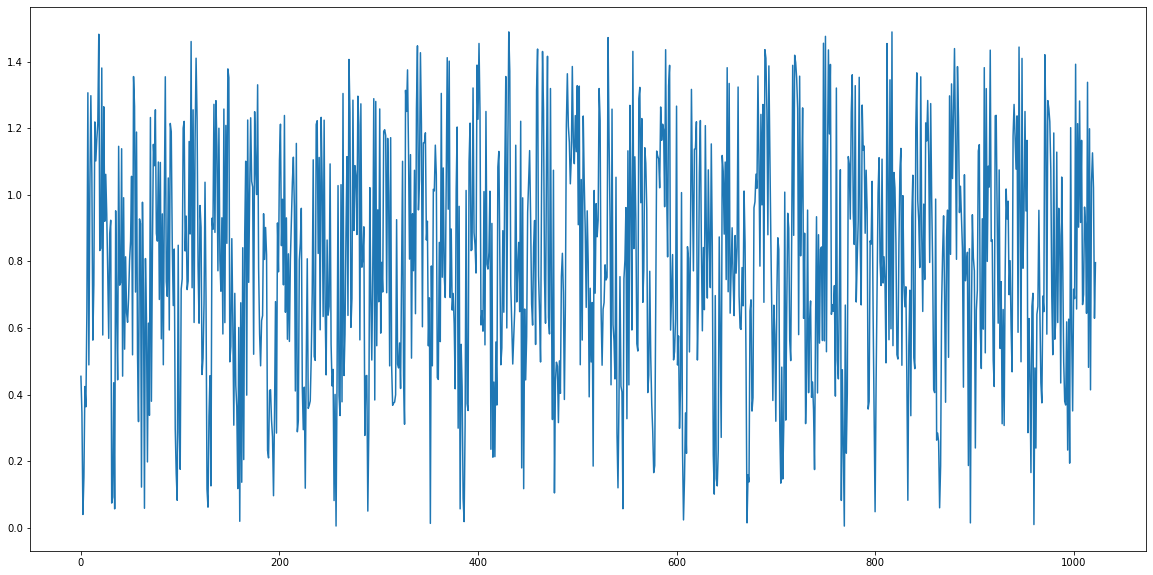

In [58]:
plt.plot(abs(np.array(t)));

# Correct Solution:



In [91]:
def dft(y):
    N=len(y)
    c =np.zeros(N,complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]* np.exp(-2j*np.pi*k*n/N)
    return c

/home/kelcey/anaconda3/envs/hera/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


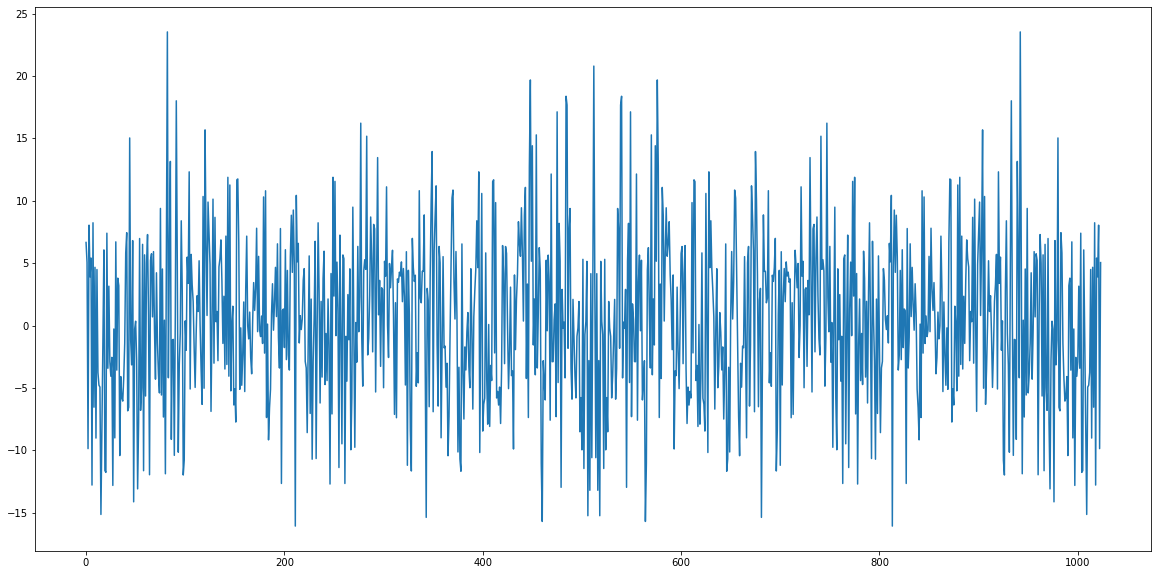

In [94]:
t = dft(table[0].values)
plt.plot(t);

 this is still wrong

In [88]:
def inv_dft(N, coeff):
    terms = []
    for i in range(N-1):
        terms.append((1/N)*coeff[i]*np.e**((-1j*2*np.pi*i*i)/(N)))
    return np.real(terms)

In [ ]:
def inv_dft(c):
    N = len(c)
    

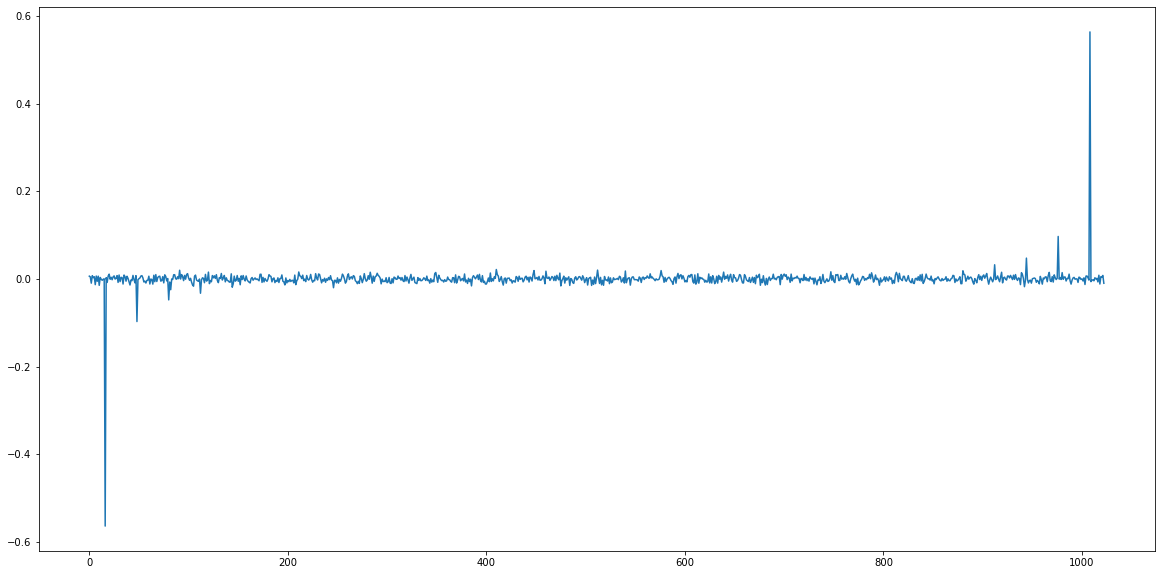

In [90]:
plt.plot(inv_dft(len(table), t));

# More notes

* 0 term: DC mode = $\frac{c_0}{N)$

* 

In [97]:
def discreteft(y):
    N=len(y)//2+1
    c =np.zeros(N,complex)
    for k in range(N):
        for n in range(len(y)):
            c[k] += y[n]* np.exp(-2j*np.pi*k*n/N)
    return(c)

/home/kelcey/anaconda3/envs/hera/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


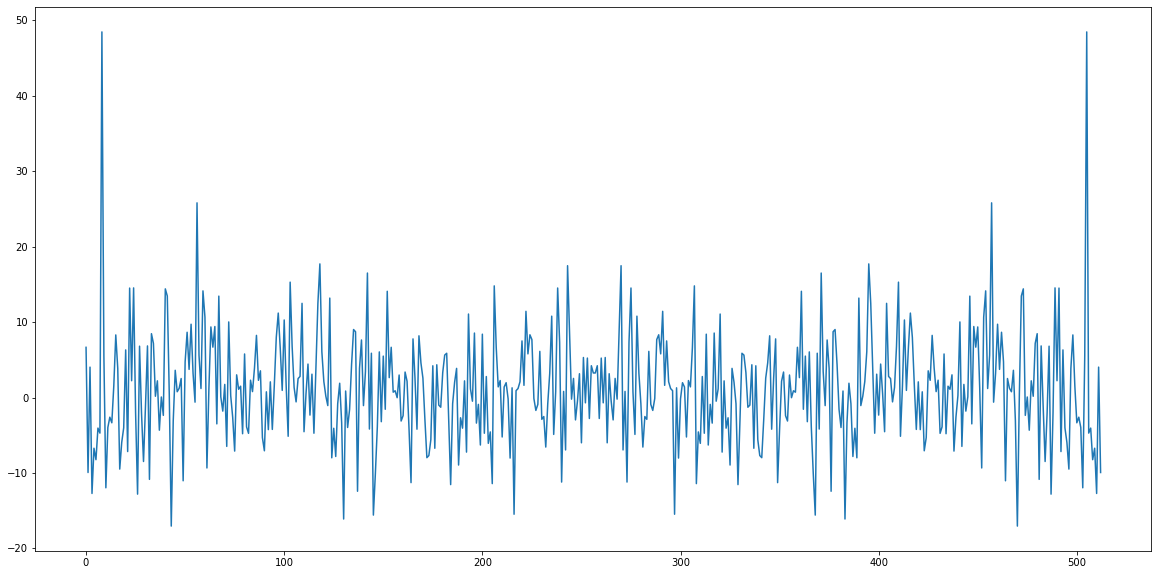

In [99]:
plt.plot(discreteft(table[0].values));

see his posted solutions to these examples

# Fast Fourier Transforms

In [100]:
plt.plot(np.fft(table[0].values))

TypeError: 'module' object is not callable

/home/kelcey/anaconda3/envs/hera/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


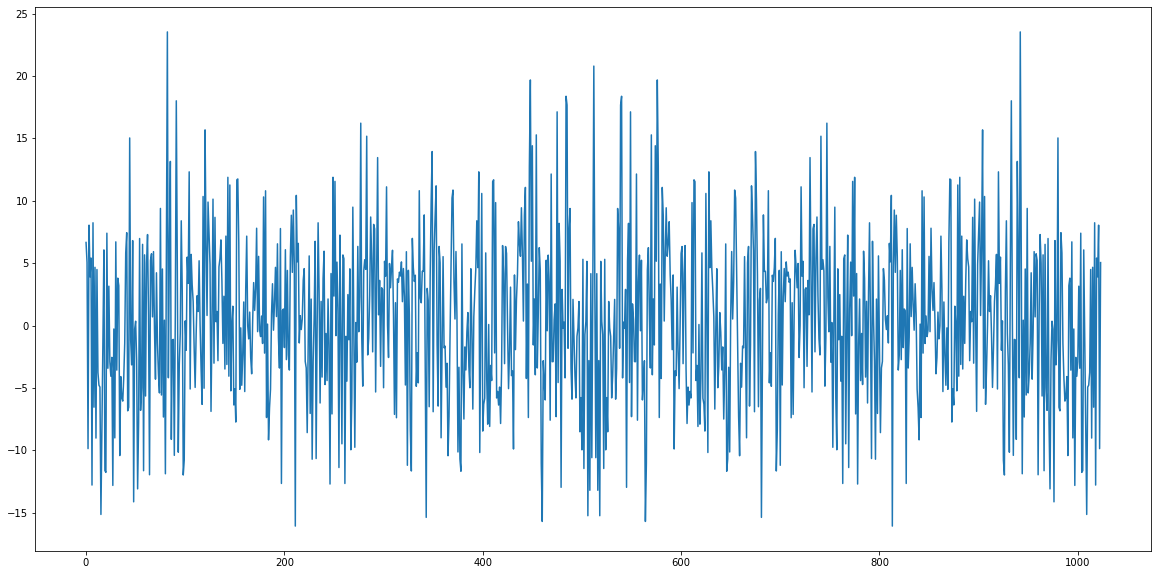

In [108]:
plt.plot(np.fft.fft(table[0].values));

In [105]:
help(np.fft)

Help on package numpy.fft in numpy:

NAME
    numpy.fft

DESCRIPTION
    Discrete Fourier Transform (:mod:`numpy.fft`)
    
    .. currentmodule:: numpy.fft
    
    The SciPy module `scipy.fft` is a more comprehensive superset
    of ``numpy.fft``, which includes only a basic set of routines.
    
    Standard FFTs
    -------------
    
    .. autosummary::
       :toctree: generated/
    
       fft       Discrete Fourier transform.
       ifft      Inverse discrete Fourier transform.
       fft2      Discrete Fourier transform in two dimensions.
       ifft2     Inverse discrete Fourier transform in two dimensions.
       fftn      Discrete Fourier transform in N-dimensions.
       ifftn     Inverse discrete Fourier transform in N dimensions.
    
    Real FFTs
    ---------
    
    .. autosummary::
       :toctree: generated/
    
       rfft      Real discrete Fourier transform.
       irfft     Inverse real discrete Fourier transform.
       rfft2     Real discrete Fourier tran